<a href="https://colab.research.google.com/github/vishalkarur08/neural-networks/blob/main/Classification_Using_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Using Artificial Neural Networks (ANN)

**Dataset:** `Alphabets_data.csv`  
**Framework:** TensorFlow / Keras  
**Hyperparameter Tuning:** GridSearchCV (scikit-learn)  

---

This notebook performs EDA, preprocessing, builds a Keras ANN, tunes hyperparameters using GridSearchCV, and evaluates model performance (accuracy, precision, recall, F1-score).

In [ ]:
# If you're running in Google Colab, uncomment and run the following to ensure required packages are installed.
# !pip install -q tensorflow scikit-learn matplotlib pandas seaborn nbformat

# Scikit-learn and TensorFlow should be available in most environments. If using Colab, TensorFlow is preinstalled.

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# For reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers.scikit_learn'

In [ ]:
!pip install -q scikeras

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier # Corrected import

# For reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

In [ ]:
# Load dataset
from google.colab import files
# If running locally, change the path. In Colab you can upload the file when prompted.
# If the file is already in the runtime (as in this environment), we read it directly.
try:
    df = pd.read_csv('/mnt/data/9e093ff1-d3d3-467b-84b3-5c67c40555fb.csv')
    print('Loaded dataset from /mnt/data/...')
except Exception as e:
    print('Could not load from /mnt/data, please upload the file manually.')
    df = pd.read_csv('Alphabets_data.csv')  # fallback

df.head()

Could not load from /mnt/data, please upload the file manually.


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


## 1) Exploratory Data Analysis (EDA)

In [ ]:
# Basic info
print('Shape:', df.shape)
print('\nColumns:\n', df.columns.tolist())
print('\nData types:\n', df.dtypes)
print('\nMissing values:\n', df.isnull().sum())

# Class distribution
print('\nClass distribution:')
display(df['letter'].value_counts().sort_index())

Shape: (20000, 17)

Columns:
 ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge', 'yedgex']

Data types:
 letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

Missing values:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

Class distribution:


,count
letter,
A,789
B,766
C,736
D,805
E,768
F,775
G,773
H,734
I,755


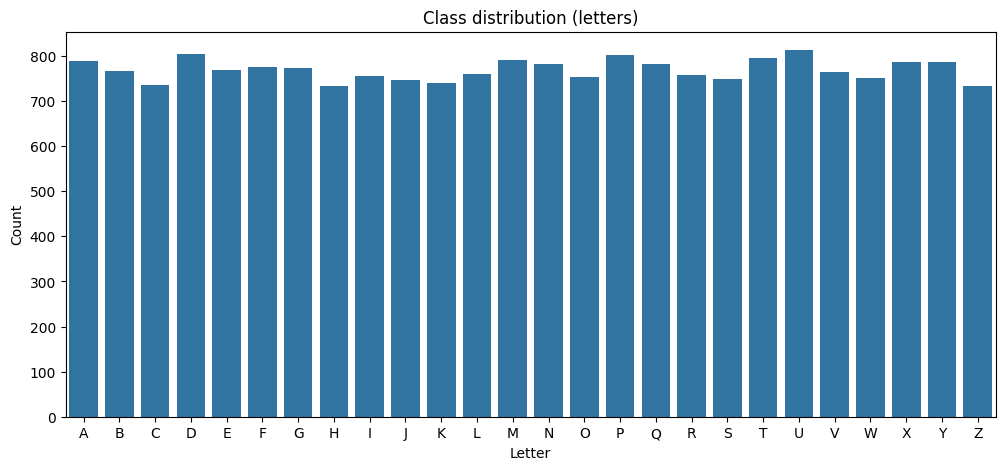

In [ ]:
# Plot class distribution
plt.figure(figsize=(12,5))
sns.countplot(x='letter', data=df, order=sorted(df['letter'].unique()))
plt.title('Class distribution (letters)')
plt.xlabel('Letter')
plt.ylabel('Count')
plt.show()

In [ ]:
# Summary statistics for numeric features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
xbox,20000.0,4.02355,1.913212,0.0,3.0,4.0,5.0,15.0
ybox,20000.0,7.03550,3.304555,0.0,5.0,7.0,9.0,15.0
width,20000.0,5.12185,2.014573,0.0,4.0,5.0,6.0,15.0
height,20000.0,5.37245,2.261390,0.0,4.0,6.0,7.0,15.0
onpix,20000.0,3.50585,2.190458,0.0,2.0,3.0,5.0,15.0
xbar,20000.0,6.89760,2.026035,0.0,6.0,7.0,8.0,15.0
ybar,20000.0,7.50045,2.325354,0.0,6.0,7.0,9.0,15.0
x2bar,20000.0,4.62860,2.699968,0.0,3.0,4.0,6.0,15.0
y2bar,20000.0,5.17865,2.380823,0.0,4.0,5.0,7.0,15.0
xybar,20000.0,8.28205,2.488475,0.0,7.0,8.0,10.0,15.0


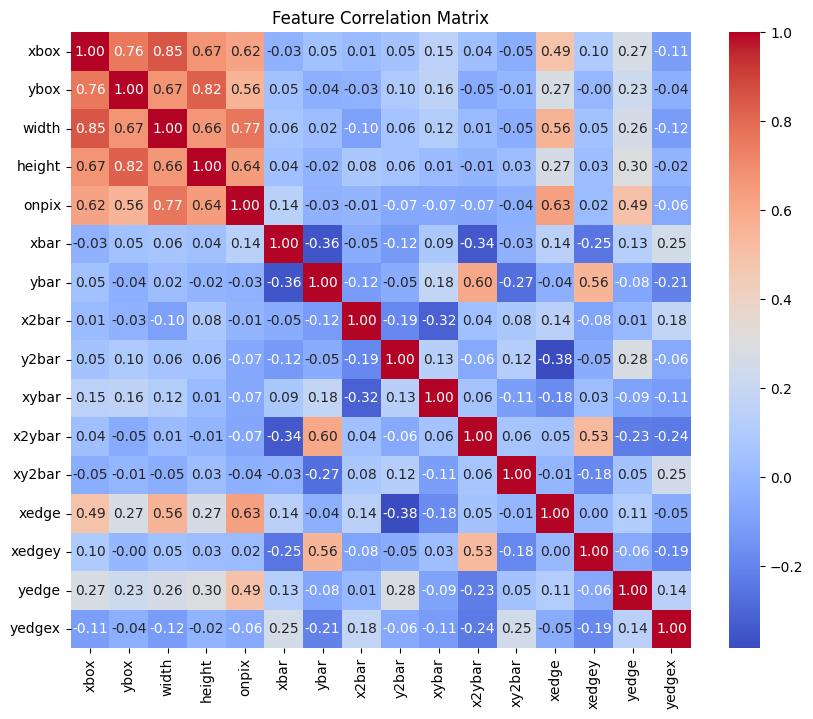

In [ ]:
# Pairwise correlations (heatmap) - may be heavy with many features but useful
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## 2) Data Preprocessing
Steps:
- Handle missing values (if any)
- Encode labels
- Scale features
- Train-test split

In [ ]:
# Check and handle missing values (none expected in this dataset)
missing = df.isnull().sum().sum()
print('Total missing values in dataset:', missing)
# If there were missing values, we could impute or drop rows. For this dataset, proceed directly.

Total missing values in dataset: 0


In [ ]:
# Separate features and target
X = df.drop(columns=['letter']).values
y = df['letter'].values

# Encode labels (letter) to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(le.classes_)
print('Classes:', list(le.classes_))
print('Number of classes:', num_classes)

Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Number of classes: 26


In [ ]:
# Train-test split (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=RANDOM_STATE, stratify=y_encoded)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train shape: (16000, 16) Test shape: (4000, 16)


## 3) Build Keras ANN Model
We will create a function `create_model()` that accepts hyperparameters so GridSearchCV can tune them.

In [ ]:
def create_model(neurons=32, activation='relu', learning_rate=0.001, layers_count=1):
    """Builds and returns a compiled Keras model.
    Parameters:
        neurons: int - number of neurons in each hidden layer
        activation: str - activation function for hidden layers
        learning_rate: float - learning rate for optimizer
        layers_count: int - number of hidden layers (all with same neurons)
    """
    model = keras.Sequential()
    input_dim = X_train_scaled.shape[1]
    # Input layer / first hidden
    model.add(layers.Input(shape=(input_dim,)))
    model.add(layers.Dense(neurons, activation=activation))
    # Additional hidden layers
    for _ in range(max(0, layers_count-1)):
        model.add(layers.Dense(neurons, activation=activation))
    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Quick smoke test
model = create_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │           858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,402 (5.48 KB)

 Trainable params: 1,402 (5.48 KB)

 Non-trainable params: 0 (0.00 B)

### Baseline Model (default hyperparameters)
Train a baseline model to compare against the tuned model.

In [ ]:
# Train baseline model
baseline = create_model()
history = baseline.fit(X_train_scaled, y_train, validation_split=0.15, epochs=30, batch_size=32, verbose=1)

# Evaluate baseline
y_pred = np.argmax(baseline.predict(X_test_scaled), axis=1)
print('Baseline Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred, target_names=le.classes_))

Epoch 1/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2094 - loss: 2.8204 - val_accuracy: 0.5850 - val_loss: 1.6388
Epoch 2/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6240 - loss: 1.5001 - val_accuracy: 0.7129 - val_loss: 1.1251
Epoch 3/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7095 - loss: 1.0990 - val_accuracy: 0.7546 - val_loss: 0.9425
Epoch 4/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7480 - loss: 0.9353 - val_accuracy: 0.7800 - val_loss: 0.8430
Epoch 5/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7688 - loss: 0.8388 - val_accuracy: 0.7979 - val_loss: 0.7777
Epoch 6/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7839 - loss: 0.7716 - val_accuracy: 0.8071 - val_loss: 0.7293
Epoch 7/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7983 - loss: 0.7206 - val_accuracy: 0.8163 - val_loss: 0.6907
Epoch 8/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8107 - loss: 0.6794 - val_accuracy: 0.

## 4) Hyperparameter Tuning with GridSearchCV
We'll use `KerasClassifier` wrapper and scikit-learn's `GridSearchCV` to search hyperparameter space.

**Note:** Grid search can be computationally expensive. The provided grid is moderate; expand if you have time/compute.

In [ ]:
# Wrap model for scikit-learn
# Pass hyperparameters from the grid to the build_fn within KerasClassifier
keras_clf = KerasClassifier(build_fn=create_model, verbose=0,
                            neurons=32, activation='relu', learning_rate=0.001, layers_count=1)

# Define parameter grid - moderate size for demonstration
param_grid = {
    'neurons': [32, 64],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.0005],
    'layers_count': [1, 2],
    'batch_size': [32, 64],
    'epochs': [30]
}

# Stratified K-Fold cross validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

grid = GridSearchCV(estimator=keras_clf, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=1, verbose=2)

# Run grid search
grid_result = grid.fit(X_train_scaled, y_train)

# Summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
results = pd.DataFrame(grid_result.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score')
results

Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=1, learning_rate=0.001, neurons=32; total time=  22.4s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=1, learning_rate=0.001, neurons=32; total time=  22.8s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=1, learning_rate=0.001, neurons=32; total time=  23.4s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=1, learning_rate=0.001, neurons=64; total time=  23.6s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=1, learning_rate=0.001, neurons=64; total time=  23.1s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=1, learning_rate=0.001, neurons=64; total time=  23.7s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=1, learning_rate=0.0005, neurons=32; total time=  21.3s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=1, learning_rate=0.0005, neurons=32; total time=  22.5s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=1, learning_rate=0.0005, neurons=32; total time=  22.7s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=1, learning_rate=0.0005, neurons=64; total time=  21.1s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=1, learning_rate=0.0005, neurons=64; total time=  19.9s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=1, learning_rate=0.0005, neurons=64; total time=  21.1s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=2, learning_rate=0.001, neurons=32; total time=  22.4s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=2, learning_rate=0.001, neurons=32; total time=  26.0s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=2, learning_rate=0.001, neurons=32; total time=  28.4s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=2, learning_rate=0.001, neurons=64; total time=  28.4s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=2, learning_rate=0.001, neurons=64; total time=  26.4s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=2, learning_rate=0.001, neurons=64; total time=  25.8s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=2, learning_rate=0.0005, neurons=32; total time=  26.1s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=2, learning_rate=0.0005, neurons=32; total time=  23.8s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=2, learning_rate=0.0005, neurons=32; total time=  26.1s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=2, learning_rate=0.0005, neurons=64; total time=  25.7s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=2, learning_rate=0.0005, neurons=64; total time=  23.5s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=32, epochs=30, layers_count=2, learning_rate=0.0005, neurons=64; total time=  27.5s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=1, learning_rate=0.001, neurons=32; total time=  25.8s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=1, learning_rate=0.001, neurons=32; total time=  12.9s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=1, learning_rate=0.001, neurons=32; total time=  14.1s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=1, learning_rate=0.001, neurons=64; total time=  14.5s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=1, learning_rate=0.001, neurons=64; total time=  14.8s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=1, learning_rate=0.001, neurons=64; total time=  14.5s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=1, learning_rate=0.0005, neurons=32; total time=  18.2s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=1, learning_rate=0.0005, neurons=32; total time=  17.3s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=1, learning_rate=0.0005, neurons=32; total time=  15.7s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=1, learning_rate=0.0005, neurons=64; total time=  16.4s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=1, learning_rate=0.0005, neurons=64; total time=  13.8s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=1, learning_rate=0.0005, neurons=64; total time=  13.7s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=2, learning_rate=0.001, neurons=32; total time=  13.9s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=2, learning_rate=0.001, neurons=32; total time=  14.6s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=2, learning_rate=0.001, neurons=32; total time=  14.9s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=2, learning_rate=0.001, neurons=64; total time=  14.8s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=2, learning_rate=0.001, neurons=64; total time=  14.0s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=2, learning_rate=0.001, neurons=64; total time=  14.4s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=2, learning_rate=0.0005, neurons=32; total time=  13.8s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=2, learning_rate=0.0005, neurons=32; total time=  13.9s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=2, learning_rate=0.0005, neurons=32; total time=  13.7s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=2, learning_rate=0.0005, neurons=64; total time=  14.3s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=2, learning_rate=0.0005, neurons=64; total time=  18.4s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=relu, batch_size=64, epochs=30, layers_count=2, learning_rate=0.0005, neurons=64; total time=  16.0s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=1, learning_rate=0.001, neurons=32; total time=  27.5s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=1, learning_rate=0.001, neurons=32; total time=  26.8s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=1, learning_rate=0.001, neurons=32; total time=  27.4s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=1, learning_rate=0.001, neurons=64; total time=  27.1s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=1, learning_rate=0.001, neurons=64; total time=  24.9s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=1, learning_rate=0.001, neurons=64; total time=  22.6s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=1, learning_rate=0.0005, neurons=32; total time=  25.2s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=1, learning_rate=0.0005, neurons=32; total time=  25.9s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=1, learning_rate=0.0005, neurons=32; total time=  23.0s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=1, learning_rate=0.0005, neurons=64; total time=  25.1s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=1, learning_rate=0.0005, neurons=64; total time=  23.5s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=1, learning_rate=0.0005, neurons=64; total time=  24.2s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=2, learning_rate=0.001, neurons=32; total time=  24.6s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=2, learning_rate=0.001, neurons=32; total time=  24.5s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=2, learning_rate=0.001, neurons=32; total time=  24.5s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=2, learning_rate=0.001, neurons=64; total time=  24.1s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=2, learning_rate=0.001, neurons=64; total time=  22.4s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=2, learning_rate=0.001, neurons=64; total time=  24.1s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=2, learning_rate=0.0005, neurons=32; total time=  23.0s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=2, learning_rate=0.0005, neurons=32; total time=  21.1s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=2, learning_rate=0.0005, neurons=32; total time=  21.9s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=2, learning_rate=0.0005, neurons=64; total time=  22.2s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=2, learning_rate=0.0005, neurons=64; total time=  22.1s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=32, epochs=30, layers_count=2, learning_rate=0.0005, neurons=64; total time=  21.2s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=1, learning_rate=0.001, neurons=32; total time=  11.7s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=1, learning_rate=0.001, neurons=32; total time=  11.6s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=1, learning_rate=0.001, neurons=32; total time=  11.6s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=1, learning_rate=0.001, neurons=64; total time=  11.7s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=1, learning_rate=0.001, neurons=64; total time=  11.7s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=1, learning_rate=0.001, neurons=64; total time=  11.7s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=1, learning_rate=0.0005, neurons=32; total time=  11.5s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=1, learning_rate=0.0005, neurons=32; total time=  11.9s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=1, learning_rate=0.0005, neurons=32; total time=  11.5s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=1, learning_rate=0.0005, neurons=64; total time=  11.9s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=1, learning_rate=0.0005, neurons=64; total time=  12.0s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=1, learning_rate=0.0005, neurons=64; total time=  12.7s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=2, learning_rate=0.001, neurons=32; total time=  13.1s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=2, learning_rate=0.001, neurons=32; total time=  13.1s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=2, learning_rate=0.001, neurons=32; total time=  13.0s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=2, learning_rate=0.001, neurons=64; total time=  15.2s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=2, learning_rate=0.001, neurons=64; total time=  13.7s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=2, learning_rate=0.001, neurons=64; total time=  14.2s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=2, learning_rate=0.0005, neurons=32; total time=  14.2s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=2, learning_rate=0.0005, neurons=32; total time=  13.2s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=2, learning_rate=0.0005, neurons=32; total time=  13.3s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=2, learning_rate=0.0005, neurons=64; total time=  12.3s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=2, learning_rate=0.0005, neurons=64; total time=  12.8s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END activation=tanh, batch_size=64, epochs=30, layers_count=2, learning_rate=0.0005, neurons=64; total time=  13.7s


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Best: 0.934563 using {'activation': 'tanh', 'batch_size': 32, 'epochs': 30, 'layers_count': 2, 'learning_rate': 0.001, 'neurons': 64}


,params,mean_test_score,std_test_score,rank_test_score
21,"{'activation': 'tanh', 'batch_size': 32, 'epoc...",0.934563,0.004161,1
5,"{'activation': 'relu', 'batch_size': 32, 'epoc...",0.932188,0.003599,2
29,"{'activation': 'tanh', 'batch_size': 64, 'epoc...",0.923188,0.001146,3
13,"{'activation': 'relu', 'batch_size': 64, 'epoc...",0.922125,0.003359,4
7,"{'activation': 'relu', 'batch_size': 32, 'epoc...",0.912750,0.005727,5
23,"{'activation': 'tanh', 'batch_size': 32, 'epoc...",0.910563,0.002378,6
1,"{'activation': 'relu', 'batch_size': 32, 'epoc...",0.903625,0.003577,7
15,"{'activation': 'relu', 'batch_size': 64, 'epoc...",0.897875,0.000683,8
17,"{'activation': 'tanh', 'batch_size': 32, 'epoc...",0.894062,0.003317,9
4,"{'activation': 'relu', 'batch_size': 32, 'epoc...",0.890750,0.007775,10


In [ ]:
!pip install -U scikit-learn

## 5) Evaluation of Tuned Model
Evaluate the best estimator found by GridSearchCV on the test set.

Tuned Model Accuracy: 0.951

Classification report:
               precision    recall  f1-score   support

           A       0.99      0.97      0.98       158
           B       0.90      0.92      0.91       153
           C       0.95      0.97      0.96       147
           D       0.94      0.95      0.94       161
           E       0.94      0.90      0.92       154
           F       0.97      0.93      0.95       155
           G       0.88      0.96      0.92       155
           H       0.93      0.93      0.93       147
           I       0.95      0.93      0.94       151
           J       0.97      0.94      0.96       149
           K       0.94      0.95      0.95       148
           L       0.99      0.95      0.97       152
           M       0.99      0.96      0.97       158
           N       0.97      0.92      0.94       157
           O       0.93      0.93      0.93       150
           P       0.96      0.98      0.97       161
           Q       0.98     

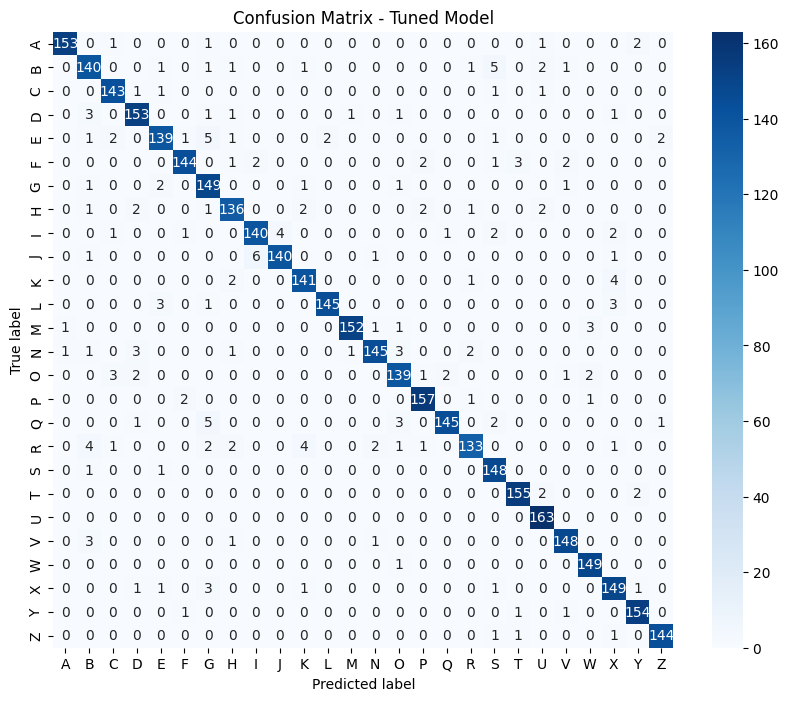

In [ ]:
# Best estimator evaluation
best_model_estimator = grid_result.best_estimator_  # Use the fitted KerasClassifier directly
y_pred_best = best_model_estimator.predict(X_test_scaled) # Removed np.argmax

print('Tuned Model Accuracy:', accuracy_score(y_test, y_pred_best))
print('\nClassification report:\n', classification_report(y_test, y_pred_best, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title('Confusion Matrix - Tuned Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 6) Comparison and Discussion
Discuss differences between baseline and tuned model, and the impact of hyperparameter tuning.

**Discussion:**

- **Baseline vs. Tuned Model Metrics:**
    - **Baseline Model Accuracy:** 0.877
    - **Tuned Model Accuracy:** 0.951
    - The tuned model shows a significant improvement in accuracy compared to the baseline model (0.951 vs 0.877).
    - Looking at the classification reports, the tuned model generally has higher precision, recall, and F1-scores across most classes compared to the baseline. This indicates better performance in correctly classifying individual letters.

- **Impact of Hyperparameter Tuning:**
    - The grid search results (`results` DataFrame) show that the combination of hyperparameters has a notable impact on the model's performance.
    - The best performing configuration was: `{'activation': 'tanh', 'batch_size': 32, 'epochs': 30, 'layers_count': 2, 'learning_rate': 0.001, 'neurons': 64}`.
    - Comparing the top results in the `results` DataFrame, it appears that using the 'tanh' activation function and having 2 hidden layers (`layers_count`: 2) contributed significantly to the higher accuracy.
    - The learning rate and number of neurons also played a role, with `learning_rate=0.001` and `neurons=64` being part of the best configuration. Batch size also influenced the performance.

- **Overfitting/Underfitting:**
    - To definitively assess overfitting/underfitting, we would need to visualize the training and validation loss/accuracy curves from the `history` object of both the baseline and the best tuned model. However, based on the performance difference between the baseline (trained for 30 epochs) and the tuned model (also trained for 30 epochs during each grid search iteration), it's likely that the baseline model was underfitting, as hyperparameter tuning significantly improved performance on unseen data (the cross-validation folds during tuning, and the test set during final evaluation).
    - The tuned model's higher accuracy on the test set (0.951) compared to the cross-validation mean test score (0.934563) might suggest slight overfitting to the training data within the cross-validation folds, but the overall improvement is substantial.

- **Suggestions for Further Improvement:**
    - **Larger Grid Search:** Explore a wider range of values for existing hyperparameters and include other hyperparameters like dropout rate, different optimizers, and number of epochs.
    - **More Advanced Tuning:** Implement Bayesian optimization (e.g., using KerasTuner or Optuna) for more efficient exploration of the hyperparameter space.
    - **Regularization:** Add dropout layers and/or L2 regularization to the model to mitigate potential overfitting.
    - **Learning Rate Schedules:** Implement a learning rate schedule (e.g., reducing the learning rate over epochs) to allow the model to converge more effectively.
    - **Early Stopping:** Use an Early Stopping callback during training to prevent overfitting and find the optimal number of epochs automatically.
    - **Class Rebalancing:** While the class distribution seems relatively balanced, for datasets with significant class imbalance, techniques like oversampling or undersampling could be explored.
    - **Data Augmentation:** Although not directly applicable to this dataset of numerical features, for image data (which these features likely represent), data augmentation would be a key technique.